# Over and Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# Target function.
def f(x: float) -> float:
    return np.sin(2 * math.pi * x)

In [3]:
# Create dataset with a little bit of gaussian noise.
X = np.linspace(0, 1, 10)
X_reshape = X.reshape(-1, 1)
X_continues = np.linspace(0, 1, 1000).reshape(-1, 1)
np.random.seed(42)
gaussian_noise = np.random.normal(0, 0.2, len(X))
y = f(X) + gaussian_noise

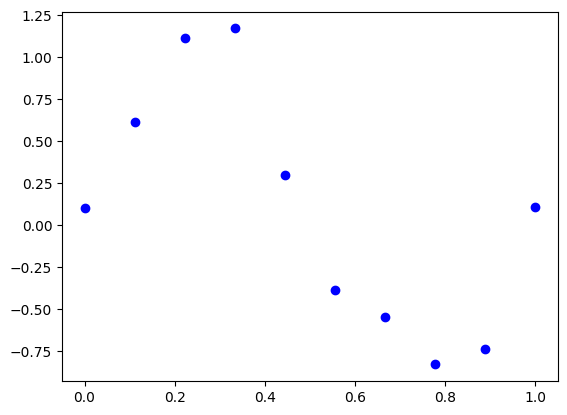

In [4]:
plt.plot(X, y, 'bo')
plt.show()

In [5]:
# Degrees for polynomials
D1, D2, D3, D4 = 0, 1, 3, 14 

model1 = make_pipeline(PolynomialFeatures(D1), LinearRegression())
model2 = make_pipeline(PolynomialFeatures(D2), LinearRegression())
model3 = make_pipeline(PolynomialFeatures(D3), LinearRegression())
model4 = make_pipeline(PolynomialFeatures(D4), LinearRegression())

# Train the models
model1.fit(X_reshape, y)

model2.fit(X_reshape, y)

model3.fit(X_reshape, y)

model4.fit(X_reshape, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('linearregression', LinearRegression())])

## How to choose D?

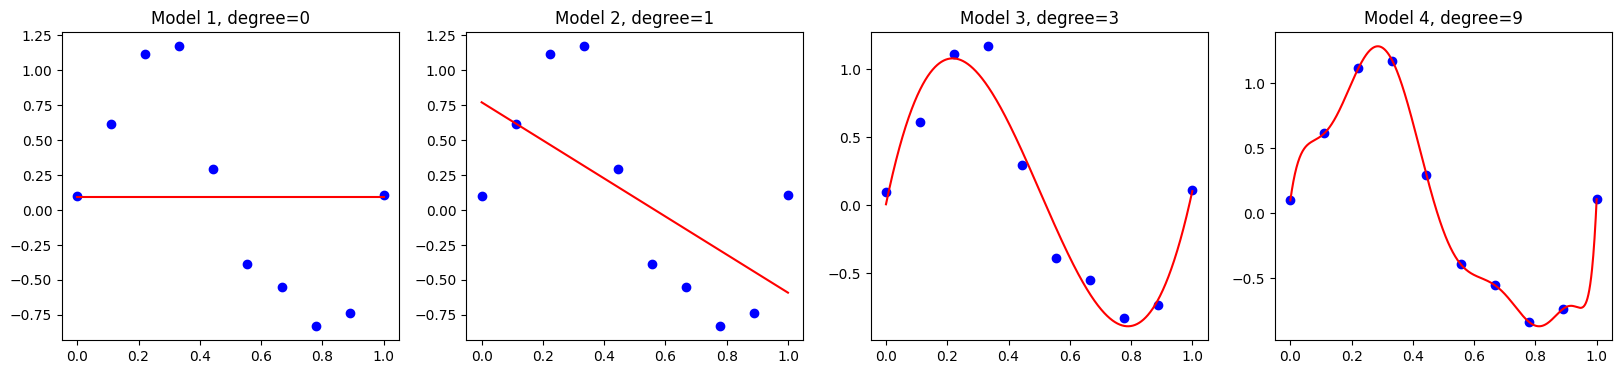

In [6]:
# Create a 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Plot each subplot
axs[0].set_title("Model 1, degree=0")
axs[0].plot(X, y, 'bo')
axs[0].plot(X_continues, model1.predict(X_continues), color='red')

axs[1].set_title("Model 2, degree=1")
axs[1].plot(X, y, 'bo')
axs[1].plot(X_continues, model2.predict(X_continues), color='red')

axs[2].set_title("Model 3, degree=3")
axs[2].plot(X, y, 'bo')
axs[2].plot(X_continues, model3.predict(X_continues), color='red')

axs[3].set_title("Model 4, degree=9")
axs[3].plot(X, y, 'bo')
axs[3].plot(X_continues, model4.predict(X_continues), color='red')

plt.show()

Model 1 fails totally, Model 2 underfits, Model 4 overfits and Model 3 does a good joob.